# Métodos Monte Carlo

Vamos a calcular el valor de Pi con dibujitos. Lo que haremos será dibujar un círculo de radio unitario centrado en el origen. Si dibujamos $N_T$ puntos aleatorios uniformemente distribuidos sobre la sección $[-1,1]\times[-1,1]$. Si somos capaces de contar todos los puntos que caen dentro del círculo, cuando $N_T \to \infty$, podremos calcular el valor de $\pi$ con precisión arbitraria. Para darnos cuenta de esto debemos notar que 

$$\lim_{N_T\to\infty}\frac{N_d}{N_t}=\frac{A_{circ}}{A_{cuadrado}}$$,

donde $N_{d}$ es el número de puntos dentro del círculo.

Si consideramos un círculo de radio $R$  es posible calcular $\pi$,
$$\pi = \frac{l^2}{R^2}\frac{N_{dentro}}{N{total}}$$.


1. Generen una gráfica con puntos aleatorios con coordenadas $\{(x,y) | x,y\in\mathcal{R},\|{x}\|<=1,\|y\|<=1\}$

2. Dibujar sobre esta distribución un círculo

3. Contamos cuantos puntos están dentro del círculo, $N_{dentro}$

4. Calcular $\pi$

In [3]:
using Plots
gr()


Plots.GRBackend()

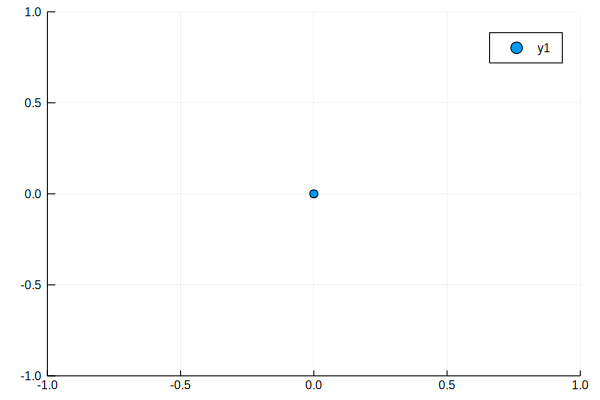

In [5]:
scatter([0],[0],xlims=(-1,1),ylims=(-1,1))

Para generar números aleatorios en el intervalo [-1,1] usamos la función `rand()`. 

In [6]:
rand([-1,1])*rand()

-0.8307407588969518

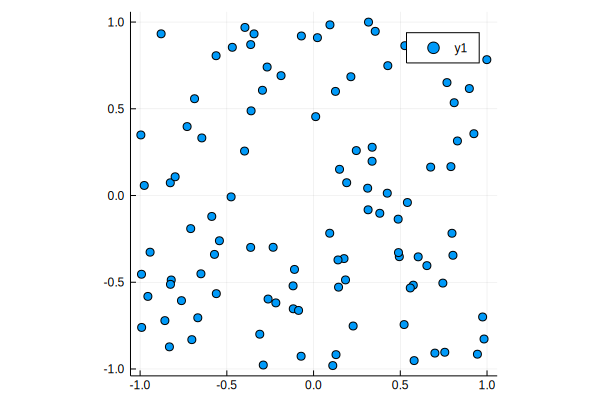

In [7]:
numero_puntos = 100
xs = [rand([-1,1])*rand() for i in 1:numero_puntos]
ys = [rand([-1,1])*rand() for i in 1:numero_puntos]
scatter(xs,ys,ratio=1)

Encimamos dos semicircunferencias en nuestra distribución.

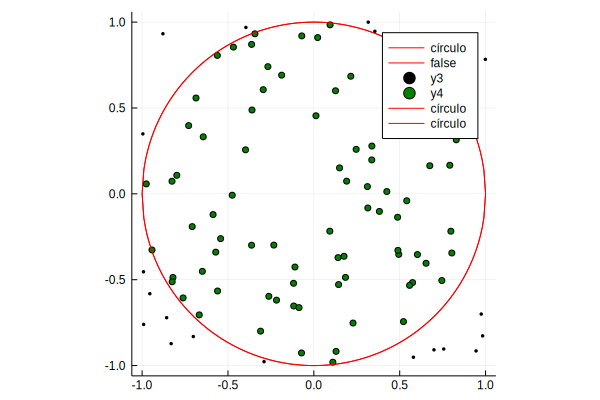

In [18]:
xc = -1:0.01:1
yc = [sqrt(1-x^2) for x in xc]
plot!(xc,yc,label="círculo",color=:red)
plot!(xc,-yc,label="círculo",color=:red)

**¿Cómo sabemos si el punto está dentro del círculo o no?**

Debemos medir su distancia al origen y compararla con el radio del círculo.



In [9]:
function distancia(x,y)  
    ### Esta función calcula la distancia al origen del punto (x,y)
    return sqrt(x^2+y^2)
    
end

distancia (generic function with 1 method)

Vamos a contruir una función que acepte dos listas de números aleatorios y cree dos listas, una con los puntos dentro y otra con los puntos fuera del círculo.


In [10]:

function dentro_fuera(x,y)
    x_dentro = [] 
    y_dentro = []
    
    x_fuera, y_fuera = [],[]   ### otra manera útil de definir múltiples variables en una sola línea
    
    for i in 1:length(x)
        if distancia(x[i],y[i]) <= 1   ### calculamos la distancia al origen
            push!(x_dentro,x[i])
            push!(y_dentro,y[i])
        else
            push!(x_fuera,x[i])
            push!(y_fuera,y[i])
        end
    end
    return x_dentro, y_dentro, x_fuera, y_fuera #### Regresa cuatro listas
end

dentro_fuera (generic function with 1 method)

**Nota:** Esta función regresa **4 listas** de números, con elementos que ocupan 64 bits de memoria cada uno.



In [11]:
x_d, y_d, x_f,y_f =dentro_fuera(xs,ys)

(Any[-0.262191, -0.561973, 0.57486, 0.803556, 0.428027, -0.360142, -0.825927, 0.337897, 0.424943, -0.542774  …  -0.571301, 0.745383, 0.314402, 0.0944804, 0.791817, -0.586847, -0.343178, 0.190936, -0.0718298, 0.675127], Any[-0.596807, 0.805935, -0.516782, -0.344568, 0.748562, 0.48811, 0.0733771, 0.278273, 0.0134252, -0.260798  …  -0.339469, -0.504891, -0.0823458, 0.984025, 0.166532, -0.12071, 0.931912, 0.073824, -0.926533, 0.163717], Any[-0.992037, 0.974665, 0.98282, 0.579775, -0.3957, 0.69949, 0.316709, 0.998874, -0.991151, -0.95517  …  0.944629, -0.290005, 0.769079, -0.99564, 0.89802, -0.70182, -0.831016, 0.526234, 0.756477, -0.878822], Any[-0.45389, -0.70016, -0.827189, -0.951682, 0.969001, -0.908445, 0.999658, 0.783203, -0.760515, -0.581651  …  -0.914794, -0.977248, 0.651035, 0.349118, 0.616681, -0.830939, -0.872426, 0.863865, -0.903555, 0.932147])

**¿Cómo sabemos que esta función está haciendo su trabajo?**

Una linda manera es graficando.

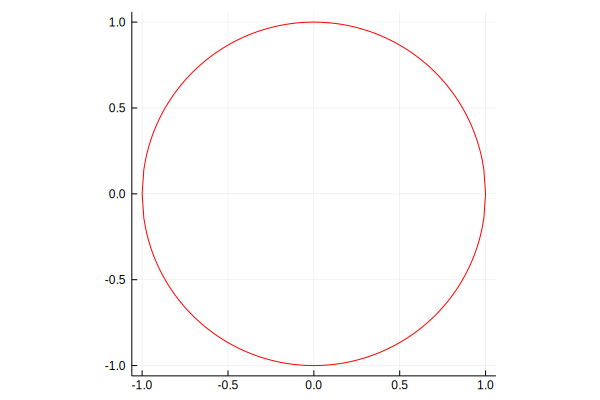

In [28]:
xc = -1:0.01:1
yc = [sqrt(1-x^2) for x in xc]
plot(xc,-yc,color=:red, leg=false)
plot!(xc,yc,label="círculo",color=:red,ratio=1)


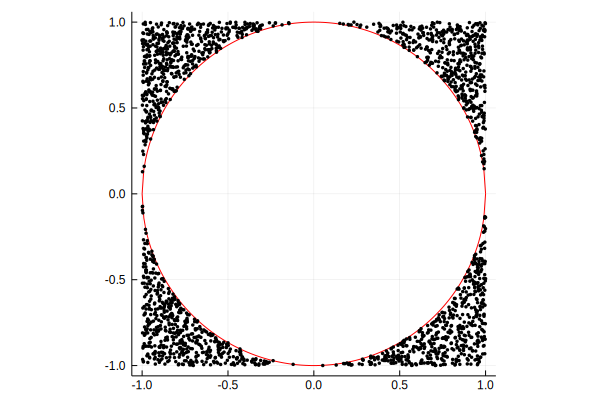

In [29]:
scatter!(x_f,y_f,color=:black,m=1)

In [30]:
scatter!(x_d,y_d,color=:green,m=3)

In [31]:
length(x_d)

7921

In [32]:
4*length(x_d)/numero_puntos

3.1684

Entre mayor sea la candidad de números mayor será la precisión. Pero ten cuidado, cerciorate de que tu computadora no se vaya a quedar sin memoria. 

**¿Hasta cuántos puntos puede contar tu computadora antes de que se quede sin memoria?**

Responde la pregunta antes de usar un número muy grande.



In [23]:
##numero_puntos = 100000000

numero_puntos = 10000
xs = [rand([-1,1])*rand() for i in 1:numero_puntos]
ys = [rand([-1,1])*rand() for i in 1:numero_puntos]

x_d,y_d,x_f,y_f = dentro_fuera(xs,ys)

numero_dentro=length(x_d)
pi_aprox=2^2*numero_dentro/numero_puntos

3.1684

## Ejercicio

1. Modifica la función `dentro_fuera()` para que el uso de memoria sea más eficiente. 

2. Intenta usar un número más grande del que tenías como límite en el método anterior. ¿Cuál es el error de tu aproximación?